# End-of-Unit Assessment: Exploratory Data Analysis (EDA)

This assessment will guide you through analysing sales data. You will identify and clean anomalies, create visualisations, and reflect on your findings. 

Partial code is provided to support your learning while challenging you to complete the tasks.

Each task section includes instructions TODO comments where you must write code.


### Dataset Context
The dataset contains sales data for an online store, including:
- **order_date**: Date of the transaction.
- **product_category**: Category of the product sold.
- **sales_amount**: Revenue generated from the sale (contains missing values and outliers).
- **quantity**: Number of items sold.
- **customer_region**: Region of the customer.

### Task 1: Load and Inspect the Data
1. Load the dataset into a Pandas DataFrame.
2. Inspect the first few rows of the dataset.
3. Generate summary statistics.

In [66]:
### Task 1: Load and Inspect the Data

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("..\data\sales_data.csv") # TODO: Lod the dataset

# Inspect the first few rows
print("First Few Rows of the Dataset:")
print(df.head())  # TODO: Fill in the method to view the dataset

# Generate summary statistics
print("\nSummary Statistics:")
print(df.describe()) # TODO: Fill in the method to generate summary statistics

First Few Rows of the Dataset:
   order_date product_category  sales_amount  quantity customer_region
0  2023-01-01      Electronics        1000.0         1           North
1  2023-01-02         Clothing           5.0         2           South
2  2023-01-03            Books           NaN         1            East
3  2023-01-04             Home         250.0         3            West
4  2023-01-05             Toys         300.0         2           North

Summary Statistics:
       sales_amount   quantity
count     20.000000  21.000000
mean     277.750000   1.761905
std      260.022646   0.768424
min        5.000000   1.000000
25%      150.000000   1.000000
50%      225.000000   2.000000
75%      300.000000   2.000000
max     1000.000000   3.000000


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\allot\AppData\Local\Temp\ipykernel_54680\968819563.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\sales_data.csv") # TODO: Lod the dataset


### Task 2: Identify Anomalies

1. Check for missing values.
2. Check for duplicate rows.

In [67]:
### Task 2: Identify Anomalies

# Check for missing values
print("Missing Values:")
print(df.info())  # TODO: Fill in the method to check for missing values

# Check for duplicate rows
print("Duplicate Rows:", df.duplicated())  # TODO: Fill in the method to count duplicates


Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_date        21 non-null     object 
 1   product_category  21 non-null     object 
 2   sales_amount      20 non-null     float64
 3   quantity          21 non-null     int64  
 4   customer_region   21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 972.0+ bytes
None
Duplicate Rows: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
dtype: bool


### Task 3: Data Cleaning

In [69]:
### Task 3: Data Cleaning

# Fill missing values in sales_amount with the median
df['sales_amount'] = df['sales_amount'].fillna(df['sales_amount'].median()) # TODO: Fill in the method

# Remove duplicate rows
df.drop_duplicates(inplace=True)  # TODO: Fill in the method to drop duplicates

# Handle outliers in sales_amount using IQR
Q1 = df['sales_amount'].quantile(0.25)
Q3 = df['sales_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

# TODO: Filter the dataset to remove outliers
df= df[(df['sales_amount'] >= lower_bound) & (df['sales_amount'] <= upper_bound )]

# Verify the cleaned data
print("\nCleaned Dataset:")
print(df)



Cleaned Dataset:
    order_date product_category  sales_amount  quantity customer_region
1   2023-01-02         Clothing           5.0         2           South
2   2023-01-03            Books         225.0         1            East
3   2023-01-04             Home         250.0         3            West
4   2023-01-05             Toys         300.0         2           North
5   2023-01-06      Electronics         100.0         1           North
6   2023-01-07         Clothing         200.0         2           South
7   2023-01-08            Books         150.0         1            East
8   2023-01-09             Home         250.0         3            West
9   2023-01-10             Toys         300.0         2           North
10  2023-01-11      Electronics         100.0         1           North
11  2023-01-12         Clothing         200.0         2           South
12  2023-01-13            Books         150.0         1            East
13  2023-01-14             Home         250.0 

### Task 4: Visual Exploration
1. Create a histogram to show the distribution of sales amounts across all transactions.
2. Create a bar plot to show the average sales amount by quantity.

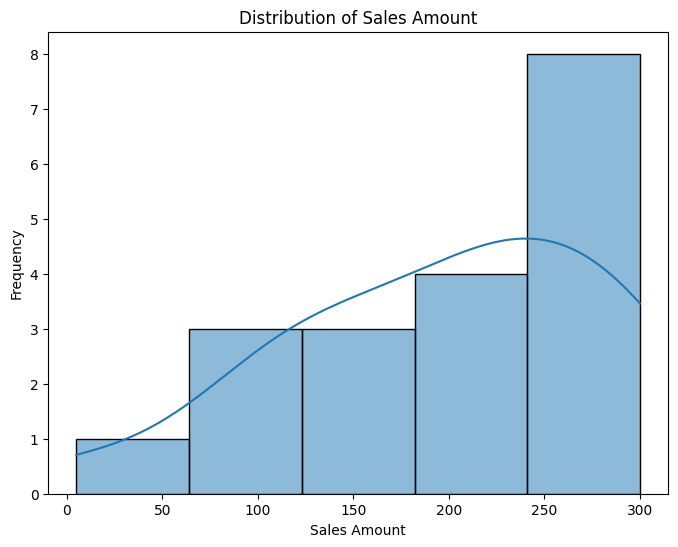

In [71]:
### Task 4: Visual Exploration

# Create a histogram for sales_amount
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['sales_amount'], bins=5, kde=True)  # TODO: Add the column name
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount') # TODO: Add the appropriate title.
plt.ylabel('Frequency')
plt.show()

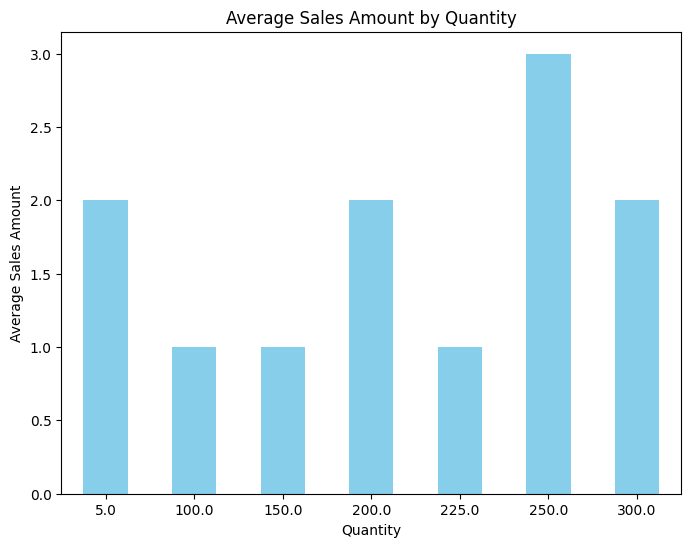

In [38]:
# Create a Bar plot for average sales_amount by quantity
average_sales = df.groupby('sales_amount')['quantity'].mean()  # TODO: Fill in the columns

plt.figure(figsize=(8, 6))
average_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales Amount by Quantity')
plt.xlabel('Quantity') # TODO: Add the appropriate title.
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=0)
plt.show()


### Task 5: Feature Engineering
1. Create a new column called `sales_per_unit` to represent the average sales amount per unit sold.
This column can help us interpret the data by providing insights into pricing strategies and product value.

In [ ]:
### Task 5: Feature Engineering

# Create a new column 'sales_per_unit' by dividing sales_amount by quantity
# This column represents the average sales amount per unit sold.
df['sales_per_unit'] = df['sales_amount'] / df['quantity'] # TODO: Fill in the columns

# Aggregate the new column 'sales_per_unit_' by product_category
category_aggregation = df.groupby('product_category')['sales_per_unit'].mean() # TODO: Fill in the columns

#  Display the results
print("Average Sales Per Unit by Product Category:")
print(category_aggregation)




Average Sales Per Unit by Product Category:
product_category
Books          168.750000
Clothing        75.625000
Electronics    100.000000
Home            83.333333
Toys           150.000000
Name: sales_per_unit, dtype: float64


### Task 6:  Actionable Insights
Provide your responses below.

#### Question 1: Identifying Key Price Ranges
- Look at the histogram for `sales_amount` in `Task 4`. Which range of sales amounts has the highest frequency?
- How might the business use this information to shape its promotions or pricing strategy?



In [ ]:
#250- 300 have the highest frequency with a count of about 8. 
#This shows that products within that price range are high in demand as such the business can increase the price slightly and improve promtion strategies for the lower priced products. 

#### Question 2: Maximising Profitability Through Quantity
- Based on the bar plot in `Task 4` showing average sales amounts by quantity, which quantity level has the highest average sales amount?
- How could the business encourage customers to buy more items per transaction? 



In [ ]:
#The business can encourage customers to buy more by offering discounts on larger purchases making it a better deal for them.

#### Question 3: Leveraging High-Value Categories
- Look at the aggregated `sales_per_unit` values by product_category in `Task 5`. Which category has the highest average sales per unit?
- How could the business focus on this category to maximise revenue?



In [ ]:
#Books has the highest average sales per unit. The business can promote books more through targeted ads and thorough offering discounts on large purchases.

#### Question 4: Integrating Insights: Visual and Non-Visual Analysis
- How did visual analysis reinforce or clarify trends observed in the non-visual analysis?

In [ ]:
# The visual representation made it easier to identify the trends and key metrics that were present in the non-visual analysis
